In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

**Introducción al modelado continuo** (*a.k.a.* **Ecuaciones de la física matemática**) - 2do Cuatrimestre 2025 - Cátedra Mindlin
# **Trabajo Práctico 1**

Este es el trabajo práctico del 1er eje temático. Se trata de un conjunto de ejercicios que deben resolver numéricamente y entregar para el **martes 30 de septiembre, inclusive**. El trabajo es en **grupos de entre 2 y 3 personas**. Deben desarrollar los ejercicios en una **notebook** de Python en Google Colab. Deben **compartir el link del archivo final** (previamente dando permisos para compartir como lector), alojado en el Google Drive de alguno de los integrantes del grupo, y mandar el link del archivo al mail *hbocaccio@gmail.com*. Deben **enviar un único mail por grupo**. El nombre del archivo debe incluir los apellidos de los integrantes del grupo separados con guión bajo, resultando el siguiente **formato “TP1IMC2025_APELLIDO1_APELLIDO2_APELLIDO3.ipynb”**.

El contenido del archivo debe incluir las celdas de código necesarias para responder las consignas, intercalando con celdas de texto en las que cuenten lo que hicieron de manera resumida. También deben incluir texto explicando los resultados obtenidos y cómo estos responden a las consignas planteadas. Se valorará cualquier tipo de discusión de los resultados en referencia a conceptos tanto de la parte numérica como de la parte dinámica. No es necesario que se extiendan mucho en las explicaciones, pero sí que muestren conocimientos adquiridos a lo largo de la cursada en referencia a los contenidos fundamentales de la materia.

---
# Ejercicio 1

Sea el siguiente sistema dinámico unidimensional

$$
\dot{x} = -x + S(\rho+cx)
$$

con

$$
S(\rho+cx)=\frac{1}{1+e^{-(\rho+cx)}}
$$

donde la función $S(\rho+cx)$ es la función sigmoidea con la entrada parametrizada en base a los parámetros $\rho$ y $c$.

1.1. Defina una función de Python que refleje los valores de la función sigmoidea en base a un valor de x, incluyendo la posibilidad de definir los parámetros como argumento de entrada. Considere por default los valores de parámetros para que el resultado sea la función $S(x)$.


In [2]:
def S(x, p=0, c=1):
    return 1/(1+np.exp(-(p + c*x)))



1.2. Estudie gráficamente la incidencia de los parámetros $\rho$ y $c$ en la forma funcional de la sigmoidea. Qué efecto tiene cada parámetro?


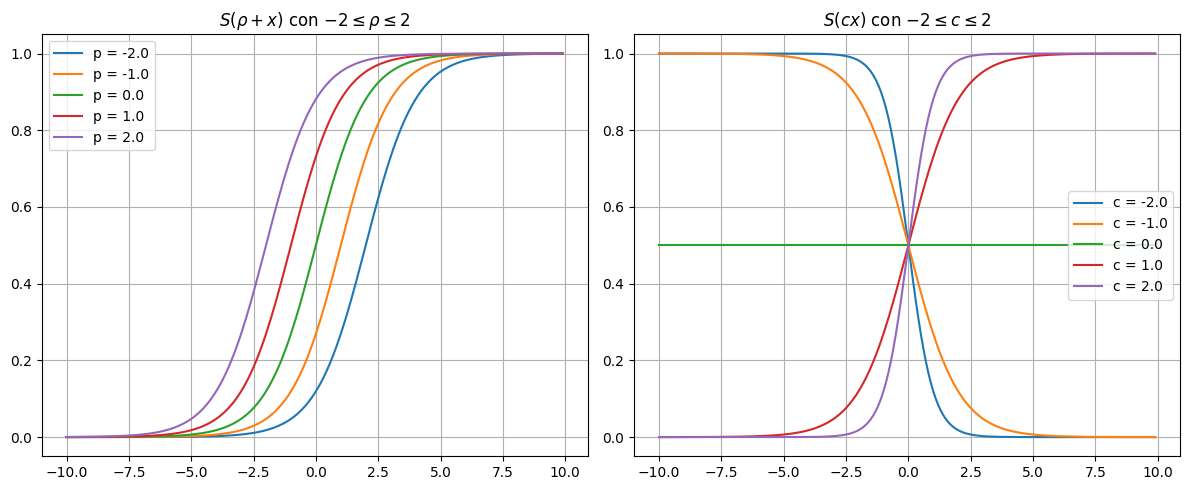

In [3]:
x = np.arange(-10,10,0.1)
p = np.arange(-2, 2.1, 1)
c = np.arange(-2, 2.1, 1)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for pi in p:
    y = S(x, pi)
    axes[0].plot(x,y, label=f"p = {pi}")
axes[0].set_title("$S(\\rho + x)$ con $-2 \\leq \\rho \\leq 2$")
axes[0].grid()
axes[0].legend()

for ci in c:
    y = S(x, c=ci)
    axes[1].plot(x, y,label=f"c = {ci}")
axes[1].set_title("$S(cx)$ con $-2 \\leq c \\leq 2$")
axes[1].grid()
axes[1].legend()

plt.tight_layout()
plt.show()

El parámetro $\rho$ lo que hace es desplazar el gráfico de la sigmoidea a la izquierda para valores de $\rho$ positivos, y a la derecha para valores de $\rho$ negativos.

El parámetro $c$ lo que hace es modificar como se comporta la transición de los límites de la función. El signo de $c$ determina de que límite a que límite de mueve, es decir, si $c$ es positivo la función comienza siendo asintótica en 0 y termina siendolo en 1, pero si $c$ es negativo esto ocurre al revés. Además si $c$ crece en módulo, la rapidez con la que se llega al otro límite aumenta, mientras que si decrece la rapidez disminuye.


1.3. Estudie gráficamente la posibilidad de existencia de puntos fijos del sistema para c=10.


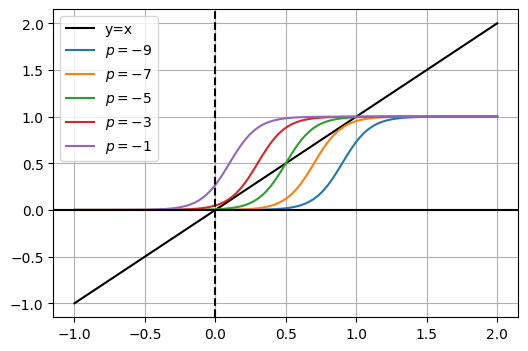

In [4]:
p =[-9, -7, -5, -3, -1]
x = np.linspace(-1, 2, 100)
plt.figure(figsize=(6, 4))
plt.plot(x, x, color='k', label="y=x")
for pi in p:
    plt.plot(x, S(x, p=pi, c=10), label=f"$p = {pi}$")
plt.axvline(x=0, color='k', linestyle="--")
plt.axhline(y=0, color='k')
plt.legend()
plt.grid()

Con estas elecciones de $\rho$, se observa que el sistema tiene 3 posiblidades, o bien tiene 1 punto fijo, o bien tiene 3 puntos fijos.

Para $\rho = -10$ el sistema $\dot{x} = -x + S(-10+10x)$

Tambien existe la posibilidad de que $\rho$ tenga 2 puntos fijos, de lo cual sucede cuando la grafica de $S(x)$ es tangente en un punto al grafico de $y = x$.

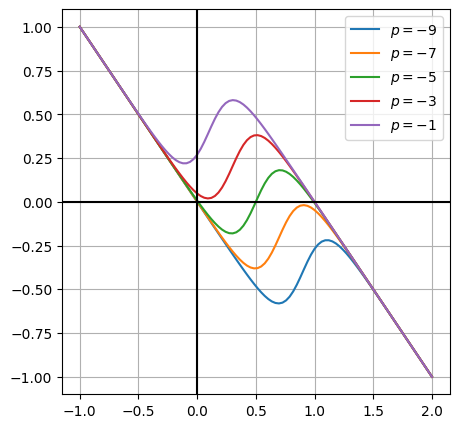

In [5]:
# Definimos el sistema
def f(x, p):
    return -x + S(x, p=p, c=10)

plt.figure(figsize=(5, 5))
for pi in p:
    plt.plot(x, f(x, pi), label=f"$p = {pi}$")
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.legend()
plt.grid()


1.4. Usando las herramientas numéricas, busque los puntos fijos del sistema para c=10 y distintos valores de $\rho$ elegidos criteriosamente en base al ejercicio anterior. Recuerde aplicar alguna estrategia para limpiar artefactos en las raíces encontradas si los hubiese, como por ejemplo, pedir que el campo vector evaluado en la raíz sea menor a una cierta cota tolerada. Analice su estabilidad a partir de la derivada numérica. Haga un diagrama de bifurcaciones para los valores de $\rho$ elegidos. Qué tipo de bifurcaciones encuentra?


Primero definimos una funcion para encontrar las raices mediante el metodo de la secante dados $f$ campo vector, $x$ intervalo de busqueda.

In [6]:
def root_finder(f, x, args, fprime=None, N=100, eps=1e-8, seed=42):
    if seed is not None:
        np.random.seed(seed)
    condiciones_iniciales = np.random.choice(x, size=N)
    soluciones = []
    for ci in condiciones_iniciales:
        try:
            soluciones.append(sp.optimize.newton(f, x0=ci, fprime=fprime, tol=eps, maxiter=200, args=args, disp=False))
        except RuntimeError:
            pass
    return np.unique(np.array(soluciones).round(3))

Ahora buscamos las raices para distintos valores de $\rho$, elegidos en base al ejercicio anterior:
- Sabemos que para $\rho = -9$, la cantidad de puntos fijos es 1, y para $\rho = 2$ tambien es solo un punto fijo.
- En clase, vimos que la cantidad de puntos fijos en este tipo de sistemas pasa de un punto fijo, a dos, luego tres, y luego vuelve a ser dos, y luego uno. Entonces, bajo esta hipotesis, este intervalo de $\rho$ es suficientemente grande para recorrer todas los posibles resultados.

Notar que no va ser posible encontrar el valor de $\rho$ donde la cantidad de puntos fijos es dos de manera analitica, ya que solo hay 2 valores de $\rho$ donde eso sucede, y solo encontraremos una aproximacion grafica.

In [7]:
def Sprima(x, p=0, c=1):
    return c * S(x, p=p, c=c) * (1 - S(x, p=p, c=c))

def fprima(x, p):
    return -1 + Sprima(x, p, c=10)

/tmp/ipython-input-3690633254.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-(p + c*x)))


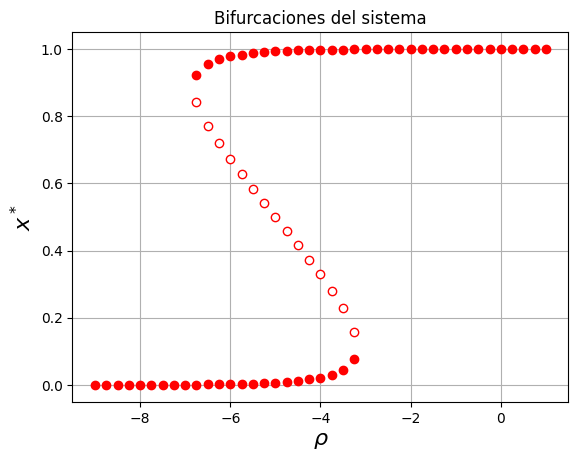

In [17]:
markerfcolors = ('w', 'r')

x = np.arange(-1, 1, 0.01)
p = np.linspace(-9, 1, 41) # justificar que este rango de rho cubre todos los casos posibles
ci = 0.1 # condicion inicial

# Iteramos sobre los valores de rho
for pi in p:
    raices = root_finder(f, x, args=(pi,))
    for raiz in raices:
        pend = fprima(raiz, pi)
        plt.plot(pi, raiz, 'o',
                 markerfacecolor=markerfcolors[int(pend < 0)],
                 markeredgecolor='r')
plt.xlabel(r"$\rho$", fontsize=16)
plt.ylabel(r"$x^*$", fontsize=16)
plt.title("Bifurcaciones del sistema")
plt.grid()
plt.show()


1.5. Considerando que las bifurcaciones separan regiones que definen comportamientos del sistema cualitativamente distintos. Para c=10, elija un valor de $\rho$ dentro de cada una de esas regiones como caso representativo de la dinámica asociada. Tengan en cuenta que no es necesario que busquen exactamente dónde están las bifurcaciones, con elegir valores de $\rho$ que me caractericen cada región y su dinámica ya es suficiente. Para cada uno de estos valores de $\rho$, estudie distintas soluciones del sistema, obtenidas de integrar con el método de Euler, para distintos valores iniciales. Cómo interpreta las trayectorias encontradas y cómo las relaciona con los resultados previos?



1.6. Usando la estrategia de integrar hacia atrás, muestre que las trayectorias obtenidas efectivamente se comportan de la manera esperada para algún punto fijo inestable del sistema, reforzando los resultados de los sub-ejercicios previos. Como consejo, piensen en las condiciones iniciales que utilizan.


---
# Ejercicio 2

Sea el siguiente sistema 2D

$$
\dot{x} = - x - x^{2} - y \\
\dot{y} = x - y
$$

2.1. Defina el sistema con una función de Python.

2.2. Busque puntos fijos a partir del estudio gráfico de las nulclinas. Para el gráfico de las nulclinas use `plt.contour` para levels=[0].

2.3. Busque numéricamente los puntos fijos con `fsolve` de Scipy.

2.4. Defina una función de Python genérica que tenga la matriz Jacobiana en función de valores de "x" e "y". Evalúe la matriz en los puntos fijos y estudie su estabilidad. Qué tipo de puntos fijos son?

2.5. Grafique el campo vector usando `plt.streamplots`. Interprete las líneas de campo obtenidas en referencia al item anterior.

2.6. Encuentre trayectorias en el espacio de fases que describan comportamientos del sistema. Para esto resuelva el sistema, usando `solve_ivp`. Use pasos largos, tiempos de integración muy cortos. Elija estos valores y las condiciones iniciales criteriosamente, de manera tal de reforzar los resultados previos, mostrando qué tipos de elementos dinámicos presenta el sistema en base a sus observaciones.

# New Section

---
# Ejercicio 3

**Modelo SIR**

Para modelar la evolución de una infección en una población se la puede dividir en tres grupos: los *susceptibles* de contraer la enfermedad ($S$), los *infectados* ($I$) y los *recuperados* ($R$). La relación entre el número de personas en cada grupo está definida por el siguiente sistema de ODEs:

$$
\frac{dS}{dt} = -\beta \frac{S\,I}{N}\\
\frac{dI}{dt} = \beta \frac{S\,I}{N} - \gamma\, I\\
\frac{dR}{dt} = \gamma\, I
$$

con $\beta$ y $\gamma$ las tasas de infección y recuperación respectivamente y $N$ la población total.

3.1. Considerar que la población de $N = 10000$ habitantes e inicialmente todas las personas son susceptibles. Supondremos una tasa de transmisión $\beta=0.2$ y un tiempo medio de recuperación de 10 días (es decir, una tasa $\gamma$ de 1/10). Si inicialmente hay una única persona enferma, discutir de qué forma deberían evolucionar las poblaciones de cada grupo. [Hint: considere que todas las personas que no están enfermas son susceptibles].

3.2. Asumiendo que no se producen fallecimientos, verificar que la población de la ciudad se mantiene constante a lo largo de la simulación.

3.3. Determinar el tiempo a partir del cual, sin acciones externas, la cantidad de infecciones llega a su máximo y comienza a descender (encontrar numéricamente, no "a ojo"). Mostrar cuál sería ese momento en la curva de I(t).

---